In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


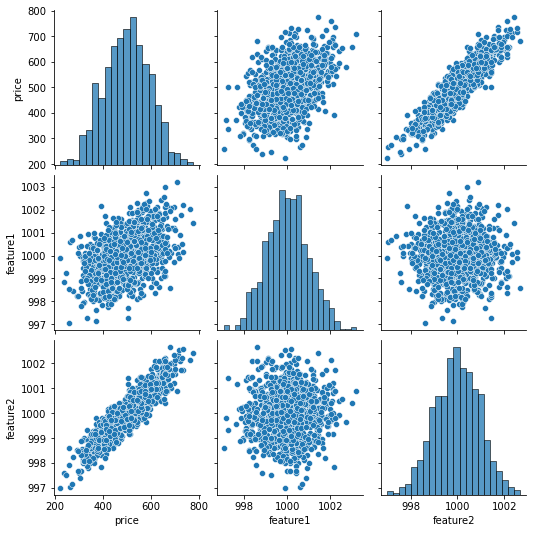

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values

In [7]:
y = df['price'].values

In [8]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
from sklearn.preprocessing import MinMaxScaler

#help(MinMaxScaler) MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and 
then divides by the range. The range is the difference between the original maximum and original minimum. 
MinMaxScaler preserves the shape of the original distribution.

MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in 
the original data. Note that MinMaxScaler doesn't reduce the importance of outliers. 
The default range for the feature returned by MinMaxScaler is 0 to 1.

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train = scaler.transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.min()

0.0

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# help(Sequential)

In [20]:
# Method-1(Hidden layers)
model = Sequential([Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])

Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimizing the function.

In [21]:
# Method-2 Prefered Method (hidden payers)
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')
# We can get these rmsprop and mse words from keras docs use help(keras)

In [22]:
model.fit(x=X_train,y=y_train,epochs=250)
# 1 epoch is one forward propogation and one backward propogation 

Epoch 1/250
22/22 [==============================] - 3s 19ms/step - loss: 249263.0204
Epoch 2/250
22/22 [==============================] - 0s 13ms/step - loss: 257504.2670
Epoch 3/250
22/22 [==============================] - 0s 12ms/step - loss: 251784.7446
Epoch 4/250
22/22 [==============================] - 0s 14ms/step - loss: 258628.5183
Epoch 5/250
22/22 [==============================] - 0s 17ms/step - loss: 252144.5007
Epoch 6/250
22/22 [==============================] - 0s 17ms/step - loss: 257734.1529
Epoch 7/250
22/22 [==============================] - 0s 19ms/step - loss: 254879.1760
Epoch 8/250
22/22 [==============================] - 0s 15ms/step - loss: 252774.1977 0s - loss: 252020.
Epoch 9/250
22/22 [==============================] - 0s 14ms/step - loss: 253386.8546
Epoch 10/250
22/22 [==============================] - 0s 11ms/step - loss: 262230.4660
Epoch 11/250
22/22 [==============================] - 0s 13ms/step - loss: 252914.2221
Epoch 12/250
22/22 [=============

In [23]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

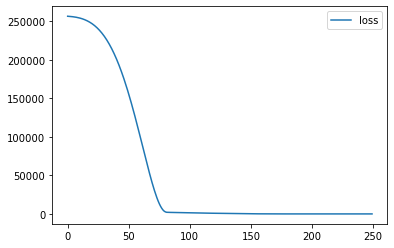

In [24]:
loss_df.plot()

In [25]:
model.evaluate(X_test,y_test,verbose=0)

25.31793975830078

In [26]:
model.evaluate(X_train,y_train,verbose=0)

23.678043365478516

In [27]:
test_predictions = model.predict(X_test)

In [28]:
#test_predictions

In [29]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [30]:
#test_predictions

In [31]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [32]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [33]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [34]:
pred_df.columns = ['Test True Y','Model Predictions']

In [35]:
pred_df

,Test True Y,Model Predictions
0,402.296319,405.584198
1,624.156198,624.185059
2,582.455066,592.732544
3,578.588606,572.775635
4,371.224104,366.823120
...,...,...
295,525.704657,529.527039
296,502.909473,515.760864
297,612.727910,610.277710
298,417.569725,417.280396


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

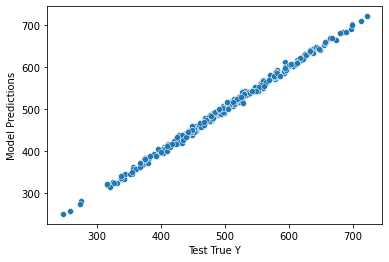

In [36]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.044652012286556

In [39]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [40]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

5.031693548769245

In [41]:
new_gem = [[998,1000]]

In [42]:
new_gem = scaler.transform(new_gem)

In [43]:
model.predict(new_gem)

array([[419.9804]], dtype=float32)

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save('my_gem_model.h5')

In [46]:
later_model = load_model('my_gem_model.h5')

In [47]:
later_model.predict(new_gem)

array([[419.9804]], dtype=float32)